In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd
from string import ascii_lowercase
from functions import *

os.mkdir("Figures") if not os.path.exists("Figures") else None

# Fig. 1

In [2]:
a = 0.805
b = 0.597
c = 0.005
N = int(1e4)
num_ic = 800
#N = 500
#num_ic = 1000
m = [1, 2, 0.5, 1.5, -1, -2, -0.5, -1.5]

xy = {1: np.array([[0.26, 0.38], [0.43, 0.54]]),
      2: np.array([[0.26, 0.38], [0.41, 0.51]]),
      0.5: np.array([[0.26, 0.39], [0.40, 0.50]]),
      1.5: np.array([[0.26, 0.38], [0.41, 0.51]]),
      -1: np.array([[0.16, 0.25], [0.285, 0.45]]),
      -2: np.array([[0.26, 0.38], [0.41, 0.52]]),
      -0.5: np.array([[0.27, 0.38], [0.405, 0.51]]),
      -1.5: np.array([[0.27, 0.37], [0.425, 0.5]])}

<Figure size 640x480 with 0 Axes>

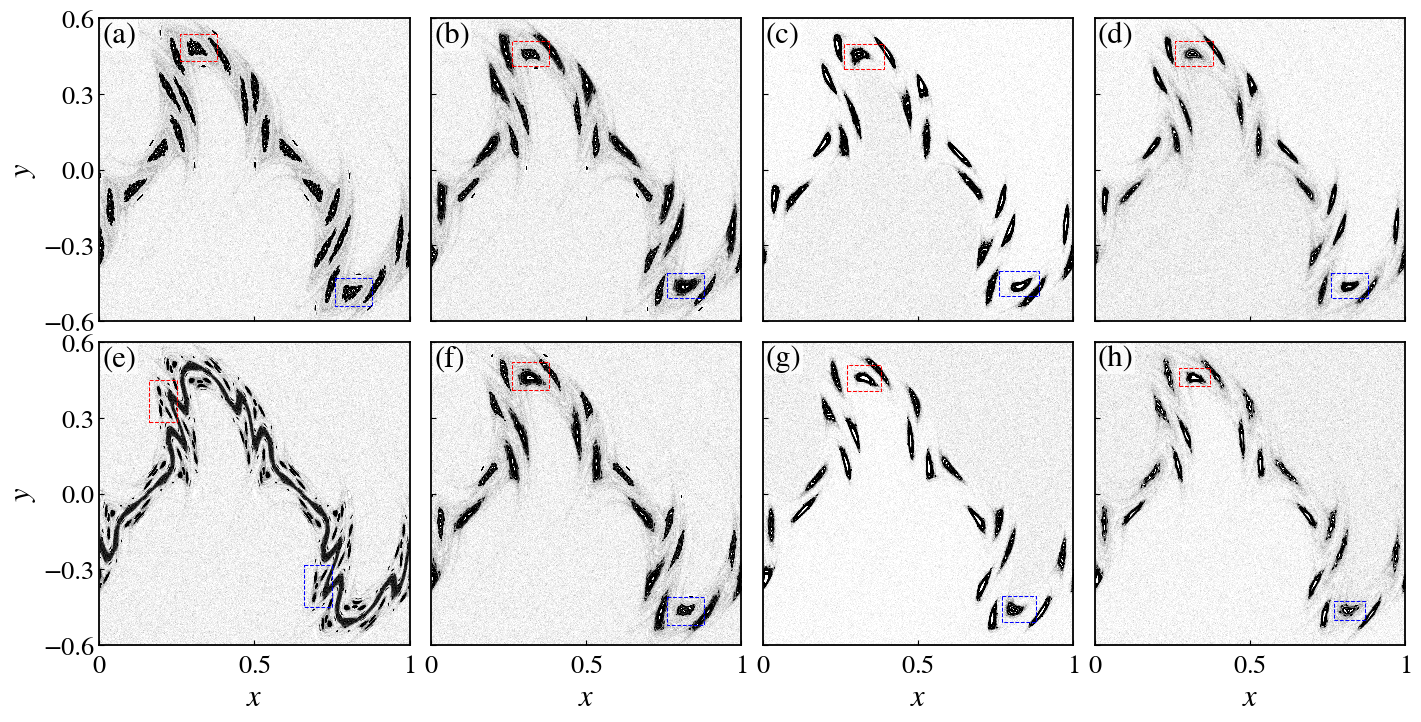

In [3]:
plot_params(fontsize=22)
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(14, 7))
set_ticks_in(ax, pad_x=7)
ms = 0.1 # Marker size
lw = 0.75
xbox = 0.0092
ybox = 0.922
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}


np.random.seed(13)
x0 = np.random.rand(int(num_ic / 2))
y0 = 0.6 * np.random.rand(int(num_ic / 2))

x0_2 = x0 + 0.5
y0_2 = -y0

for i in range(len(m)):
    ts = time_series_ICs(x0, y0, a, b, c, m[i], N)
    ax.flat[i].plot(ts[:, 0], ts[:, 1], "ko", markersize=ms, markeredgewidth=0)
    ts = time_series_ICs(x0_2, y0_2, a, b, c, m[i], N)
    ax.flat[i].plot(ts[:, 0], ts[:, 1], "ko", markersize=ms, markeredgewidth=0)
    ax.flat[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax.flat[i].transAxes, bbox=bbox)
    x_min, x_max = xy[m[i]][0]
    y_min, y_max = xy[m[i]][1]
    ax.flat[i].plot([x_min, x_max, x_max, x_min, x_min],
            [y_min, y_min, y_max, y_max, y_min],
            'r--', linewidth=lw)
    x_min = x_min + 0.5
    x_max = x_max + 0.5
    y_min = -y_min
    y_max = -y_max
    ax.flat[i].plot([x_min, x_max, x_max, x_min, x_min],
            [y_min, y_min, y_max, y_max, y_min],
            'b--', linewidth=lw)
ax[0, 0].set_xlim(0, 1)
ax[0, 0].set_ylim(-0.6, 0.6)
ax[0, 0].set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
ax[0, 0].set_xticks([0, 0.5, 1])
ax[0, 0].set_xticklabels(["$0$", "$0.5$", "$1$"])


[ax[i, 0].set_ylabel("$y$") for i in range(2)]
[ax[-1, i].set_xlabel("$x$") for i in range(4)]

plt.subplots_adjust(left=0.0625, bottom=0.09, right=0.995, top=0.985, hspace=0.07, wspace=0.07)

plt.savefig("Figures/fig1.png", dpi=400)

# Fig. 2

In [ ]:
a = 0.805
b = 0.597
c = 0.005
N = int(2e4)
num_ic = 300
m = [1, 2, 0.5, 1.5, -1, -2, -0.5, -1.5]

xy = {1: np.array([[0.26, 0.38], [0.43, 0.54]]),
      2: np.array([[0.26, 0.38], [0.41, 0.51]]),
      0.5: np.array([[0.26, 0.39], [0.40, 0.50]]),
      1.5: np.array([[0.26, 0.38], [0.41, 0.51]]),
      -1: np.array([[0.16, 0.25], [0.285, 0.45]]),
      -2: np.array([[0.26, 0.38], [0.41, 0.52]]),
      -0.5: np.array([[0.27, 0.38], [0.405, 0.51]]),
      -1.5: np.array([[0.27, 0.37], [0.425, 0.5]])}

<Figure size 640x480 with 0 Axes>

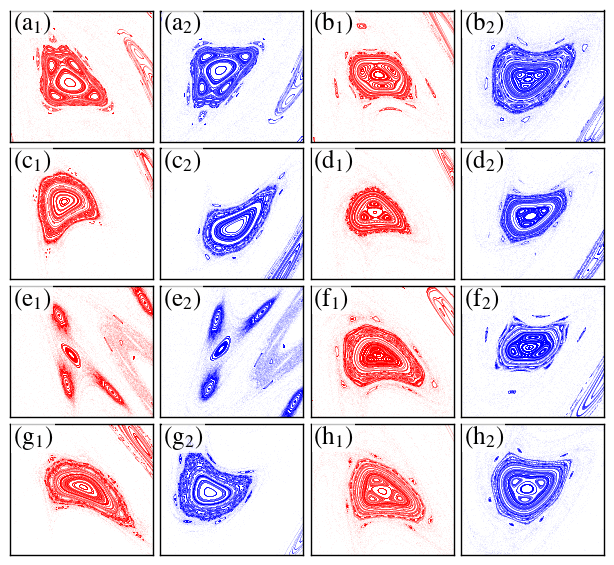

In [ ]:
plot_params(axes_linewidth=1, fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(6, 5.5))
ms = 0.1
xbox = 0.02
ybox = 0.85
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
np.random.seed(13)

i = 0
while i < 2 * len(m):
    x_min, x_max = xy[m[int(i / 2)]][0]
    y_min, y_max = xy[m[int(i / 2)]][1]
    x0 = x_min + (x_max - x_min) * np.random.rand(num_ic)
    y0 = y_min + (y_max - y_min) * np.random.rand(num_ic)
    ts = time_series_ICs(x0, y0, a, b, c, m[int(i / 2)], N)
    ax.flat[i].plot(ts[:, 0], ts[:, 1], "ro", markersize=ms, markeredgewidth=0)
    ax.flat[i].set_xlim(x_min, x_max)
    ax.flat[i].set_ylim(y_min, y_max)
    ax.flat[i].set_xticks([])
    ax.flat[i].set_yticks([])
    
    x0 = x0 + 0.5
    y0 = -y0
    ts = time_series_ICs(x0, y0, a, b, c, m[int(i / 2)], N)
    ax.flat[i + 1].plot(ts[:, 0], ts[:, 1], "bo", markersize=ms, markeredgewidth=0)
    ax.flat[i + 1].set_xlim(x0.min(), x0.max())
    ax.flat[i + 1].set_ylim(y0.min(), y0.max())
    ax.flat[i + 1].set_xticks([])
    ax.flat[i + 1].set_yticks([])
    
    ax.flat[i].text(xbox, ybox, f"({ascii_lowercase[int(i / 2)]}$_1$)", transform=ax.flat[i].transAxes, bbox=bbox)
    ax.flat[i+1].text(xbox, ybox, f"({ascii_lowercase[int(i / 2)]}$_2$)", transform=ax.flat[i + 1].transAxes, bbox=bbox)
    i += 2
    
plt.subplots_adjust(left=0.005, bottom=0.005, right=1 - 0.005, top=1 - 0.005, hspace=0.05, wspace=0.05)
plt.savefig("Figures/fig2.png", dpi=400)

# Fig. 3

In [ ]:
m_ini = -10
m_end = 10
dm = 0.01
num_ic = 10000
N = int(1e6)

y0 = 1
esc_y = -1
df = f"Data/transmissivity_vs_m_y0={format_number(y0)}_m0={format_number(m_ini)}_m1={format_number(m_end)}_dm={format_number(dm)}_nic={num_ic}_N={N}_escy={format_number(esc_y)}.dat"
Tdown = pd.read_csv(df, sep=r"\s+", header=None)
Tdown.columns = ["m", "T"]

y0 = -1
esc_y = 1
df = f"Data/transmissivity_vs_m_y0={format_number(y0)}_m0={format_number(m_ini)}_m1={format_number(m_end)}_dm={format_number(dm)}_nic={num_ic}_N={N}_escy={format_number(esc_y)}.dat"
Tup = pd.read_csv(df, sep=r"\s+", header=None)
Tup.columns = ["m", "T"]

<Figure size 640x480 with 0 Axes>

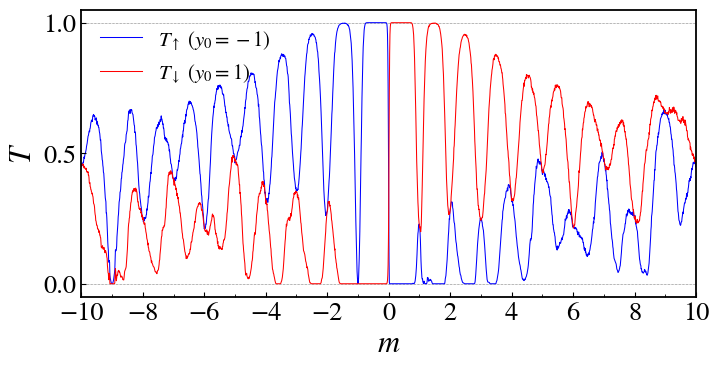

In [4]:
fontsize=22
plot_params(fontsize=fontsize, legend_fontsize=15)
fig, ax = plt.subplots(figsize=(7, 3.5))
set_ticks_in(ax)
lw = 0.75

ax.plot(Tup["m"], Tup["T"], color="b", lw=lw, label=r"$T_\uparrow$ ($y_0 = -1$)", zorder=1)
ax.plot(Tdown["m"], Tdown["T"], color="r", lw=lw, label=r"$T_\downarrow$ ($y_0 = 1$)", zorder=1)
ax.set_ylabel(r"$T$")
ax.set_xlabel(r"$m$")
ax.legend(loc="upper left", frameon=False, ncol=1)
ax.plot([m_ini, m_end], [0, 0], color="k", lw=lw / 2, ls=":", zorder=0)
ax.plot([m_ini, m_end], [1, 1], color="k", lw=lw / 2, ls=":", zorder=0)

ax.set_xticks(np.arange(m_ini, m_end + 1, 2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlim(m_ini, m_end)
ax.set_yticks([0, 0.5, 1])

plt.tight_layout(pad=0.01)

figname = "Figures/fig3.eps"
plt.savefig(figname, dpi=400)

# Fig. 4

<Figure size 640x480 with 0 Axes>

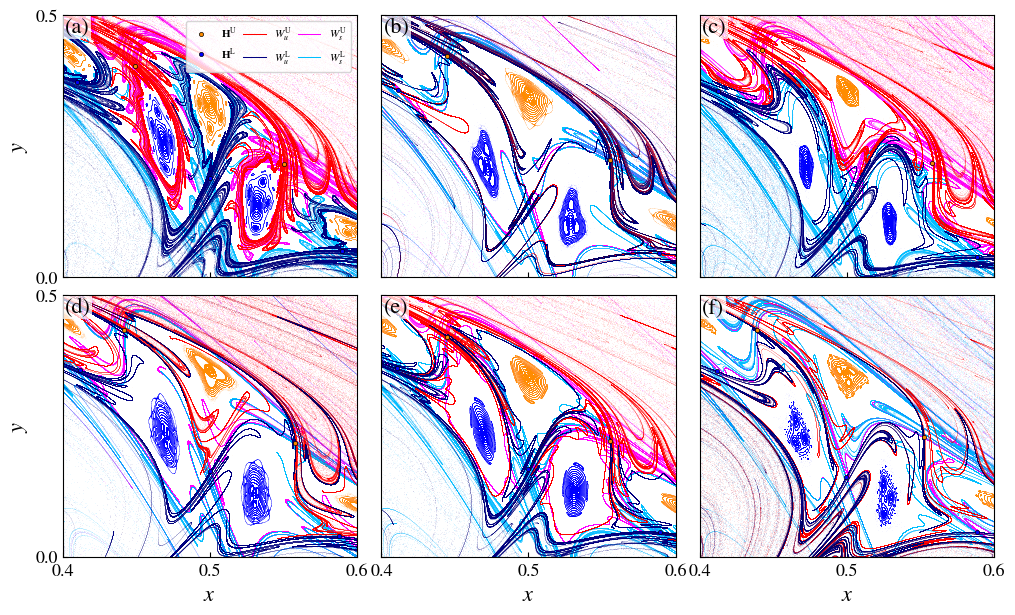

In [ ]:
a = 0.805
b = 0.597
c = 0.005
num_ic = int(1e5)
period = 11
colors = ["red", "navy", "fuchsia", "deepskyblue", "darkorange", "blue"]
manis = ["upper_unstable", "lower_unstable", "upper_stable", "lower_stable"]
zorder = [2, 2, 1, 1]
labels = ["$W_u^{\\mathrm{U}}$", "$W_u^{\\mathrm{L}}$", "$W_s^{\\mathrm{U}}$", "$W_s^{\\mathrm{L}}$"]

x_range = (0.4, 0.6)
y_range = (0, 0.5)
m = [1, 2, 3, -2, -3, 3.5]

fontsize = 16
plot_params(fontsize=fontsize, legend_fontsize=8, axes_linewidth=0.8)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
set_ticks_in(ax, pad_x=5)
ms = 0.15
ms2 = 0.1
mew = 0.5
xbox = 0.007
ybox = 0.9347
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(len(m)):
    ax.flat[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax.flat[i].transAxes, bbox=bbox)
    df = f"Data/upper_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uhc, y_uhc = np.loadtxt(df, unpack=True)

    df = f"Data/lower_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lhc, y_lhc = np.loadtxt(df, unpack=True)

    upper_hyp_chain = time_series(x_uhc, y_uhc, a, b, c, m[i], period)
    lower_hyp_chain = time_series(x_lhc, y_lhc, a, b, c, m[i], period)
    ax.flat[i].plot(upper_hyp_chain[:, 0], upper_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-2], label="$\\mathbf{H}^{\\mathrm{U}}$", markeredgewidth=mew)
    ax.flat[i].plot(lower_hyp_chain[:, 0], lower_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-1], label="$\\mathbf{H}^{\\mathrm{L}}$", markeredgewidth=mew)

    df = f"Data/upper_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uec, y_uec = np.loadtxt(df, unpack=True)

    df = f"Data/lower_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lec, y_lec = np.loadtxt(df, unpack=True)

    x = x_uec - 1e-2 * np.linspace(0, 1, 15)
    y = (y_uec - np.tan(np.pi/4) * x) + np.tan(np.pi / 4) * x
    N = 50000
    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-2])

    if m[i] == int(m[i]) and m[i] % 2 != 0:
        x = x + 1/2
        y = -y
    else:
        x = x_lec + 1e-2 * np.linspace(0, 1, 15)
        y = (y_lec - np.tan(np.pi/4) * x) + np.tan(np.pi / 4) * x

    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-1])
    for j in range(len(manis)):
        df = f"Data/{manis[j]}_manifold_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}_nic={num_ic}.dat"
        df = pd.read_csv(df, header=None, sep=r"\s+")

        df = df[(df[0] >= x_range[0]) & (df[0] <= x_range[1]) & (df[1] >= y_range[0]) & (df[1] <= y_range[1])]
        ax.flat[i].plot([0, 0], [0, 0], c=colors[j], label=labels[j], lw=0.75)
        ax.flat[i].plot(df[0], df[1], "o", markersize=ms, markeredgewidth=0, zorder=zorder[j], c=colors[j])

ax[0, 0].set_xticks([0.4, 0.5, 0.6])
ax[0, 0].set_yticks([0, 0.5])
ax[0, 0].legend(loc="upper right", ncol=3, columnspacing=0.5)
ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")
ax[1, 2].set_xlabel("$x$")
ax.flat[0].set_xlim(x_range[0], x_range[1])
ax.flat[0].set_ylim(y_range[0], y_range[1])
plt.tight_layout(pad=0.1)
figname = "Figures/fig4.png"
plt.savefig(figname, dpi=400)

# Fig. 5

<Figure size 640x480 with 0 Axes>

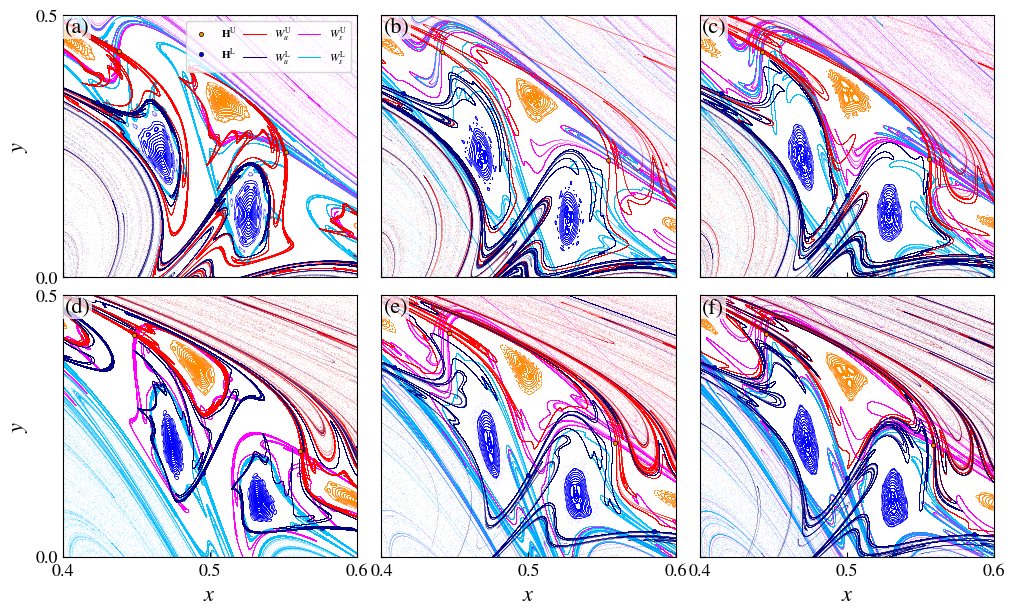

In [ ]:
a = 0.805
b = 0.597
c = 0.005
num_ic = int(1e5)
period = 11
colors = ["red", "navy", "fuchsia", "deepskyblue", "darkorange", "blue"]
manis = ["upper_unstable", "lower_unstable", "upper_stable", "lower_stable"]
zorder = [2, 2, 1, 1]
labels = ["$W_u^{\\mathrm{U}}$", "$W_u^{\\mathrm{L}}$", "$W_s^{\\mathrm{U}}$", "$W_s^{\\mathrm{L}}$"]

x_range = (0.4, 0.6)
y_range = (0, 0.5)
m = [0.5, 1.5, 2.5, -0.5, -1.5, -2.5]

fontsize = 16
plot_params(fontsize=fontsize, legend_fontsize=8, axes_linewidth=0.8)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
set_ticks_in(ax, pad_x=5)
ms = 0.15
ms2 = 0.1
mew = 0.5
xbox = 0.007
ybox = 0.9347
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(len(m)):
    ax.flat[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax.flat[i].transAxes, bbox=bbox)
    df = f"Data/upper_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uhc, y_uhc = np.loadtxt(df, unpack=True)

    df = f"Data/lower_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lhc, y_lhc = np.loadtxt(df, unpack=True)

    upper_hyp_chain = time_series(x_uhc, y_uhc, a, b, c, m[i], period)
    lower_hyp_chain = time_series(x_lhc, y_lhc, a, b, c, m[i], period)
    ax.flat[i].plot(upper_hyp_chain[:, 0], upper_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-2], label="$\\mathbf{H}^{\\mathrm{U}}$", markeredgewidth=mew)
    ax.flat[i].plot(lower_hyp_chain[:, 0], lower_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-1], label="$\\mathbf{H}^{\\mathrm{L}}$", markeredgewidth=mew)

    df = f"Data/upper_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uec, y_uec = np.loadtxt(df, unpack=True)

    df = f"Data/lower_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lec, y_lec = np.loadtxt(df, unpack=True)

    x = x_uec - 1e-2 * np.linspace(0, 1, 15)
    y = (y_uec - np.tan(np.pi/4) * x) + np.tan(np.pi / 4) * x
    N = 50000
    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-2])

    if m[i] == int(m[i]) and m[i] % 2 != 0:
        x = x + 1/2
        y = -y
    else:
        x = x_lec + 1e-2 * np.linspace(0, 1, 15)
        y = (y_lec - np.tan(np.pi/4) * x) + np.tan(np.pi / 4) * x

    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-1])
    for j in range(len(manis)):
        df = f"Data/{manis[j]}_manifold_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}_nic={num_ic}.dat"
        df = pd.read_csv(df, header=None, sep=r"\s+")

        df = df[(df[0] >= x_range[0]) & (df[0] <= x_range[1]) & (df[1] >= y_range[0]) & (df[1] <= y_range[1])]
        ax.flat[i].plot([0, 0], [0, 0], c=colors[j], label=labels[j], lw=0.75)
        ax.flat[i].plot(df[0], df[1], "o", markersize=ms, markeredgewidth=0, zorder=zorder[j], c=colors[j])

ax[0, 0].set_xticks([0.4, 0.5, 0.6])
ax[0, 0].set_yticks([0, 0.5])
ax[0, 0].legend(loc="upper right", ncol=3, columnspacing=0.5)
ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")
ax[1, 2].set_xlabel("$x$")
ax.flat[0].set_xlim(x_range[0], x_range[1])
ax.flat[0].set_ylim(y_range[0], y_range[1])
plt.tight_layout(pad=0.1)
figname = "Figures/fig5.png"
plt.savefig(figname, dpi=400)

# Fig. 6

In [ ]:
a = 0.805
b = 0.597
c = 0.005
df = f"Data/rotation_number_m={format_number(-9)}_a={format_number(a)}_b={format_number(b)}_c={format_number(c)}_N={int(1e5)}.dat"
df = pd.read_csv(df, sep=r"\s+", header=None)
ymax = df[df[1] == df[1].max()].values[0][0]
sc = time_series(0.5, ymax, a, b, c, -9., 100000)

<Figure size 640x480 with 0 Axes>

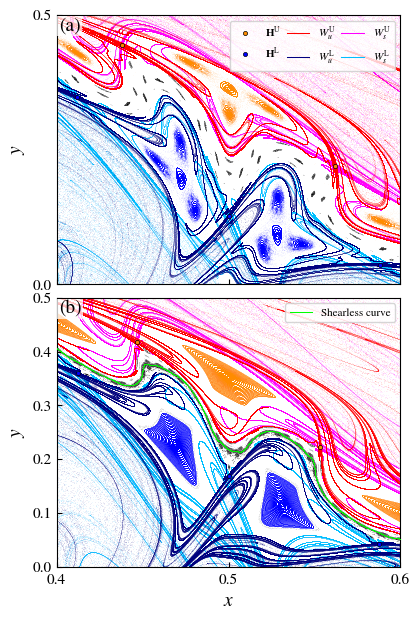

In [ ]:
num_ic = int(1e5)
period = 11
colors = ["red", "navy", "fuchsia", "deepskyblue", "darkorange", "blue"]
manis = ["upper_unstable", "lower_unstable", "upper_stable", "lower_stable"]
zorder = [2, 2, 1, 1]
labels = ["$W_u^{\\mathrm{U}}$", "$W_u^{\\mathrm{L}}$", "$W_s^{\\mathrm{U}}$", "$W_s^{\\mathrm{L}}$"]

x_range = (0.4, 0.6)
y_range = (0, 0.5)
m = [-1, -9]

fontsize = 14
plot_params(fontsize=fontsize, legend_fontsize=8, axes_linewidth=0.8)
fig, ax = plt.subplots(2, 1, figsize=(4, 6))
set_ticks_in(ax, pad_x=5)
ms = 0.15
ms2 = 0.1
mew = 0.5
xbox = 0.00595
ybox = 0.9429
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(len(m)):
    ax.flat[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax.flat[i].transAxes, bbox=bbox)
    df = f"Data/upper_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uhc, y_uhc = np.loadtxt(df, unpack=True)

    df = f"Data/lower_hyperbolic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lhc, y_lhc = np.loadtxt(df, unpack=True)

    upper_hyp_chain = time_series(x_uhc, y_uhc, a, b, c, m[i], period)
    lower_hyp_chain = time_series(x_lhc, y_lhc, a, b, c, m[i], period)
    ax.flat[i].plot(upper_hyp_chain[:, 0], upper_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-2], label="$\\mathbf{H}^{\\mathrm{U}}$", markeredgewidth=mew)
    ax.flat[i].plot(lower_hyp_chain[:, 0], lower_hyp_chain[:, 1], "o", markersize=3, markeredgecolor="k", zorder=3, c=colors[-1], label="$\\mathbf{H}^{\\mathrm{L}}$", markeredgewidth=mew)

    df = f"Data/upper_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_uec, y_uec = np.loadtxt(df, unpack=True)

    df = f"Data/lower_elliptic_point_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}.dat"
    x_lec, y_lec = np.loadtxt(df, unpack=True)

    x = x_uec - 2.5e-2 * np.linspace(0, 1, 22)
    incl = -np.pi / 2.8
    y = (y_uec - np.tan(incl) * x_uec) + np.tan(incl) * x
    N = 50000
    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        # ax.flat[i].plot(x[j], y[j], "o", markersize=2, markeredgewidth=0, zorder=1, c=colors[-2])
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-2])

    if m[i] == int(m[i]) and m[i] % 2 != 0:
        x = x + 1/2
        y = -y
    else:
        x = x_lec + 1.5e-2 * np.linspace(0, 1, 15)
        y = (y_lec - np.tan(np.pi/4) * x) + np.tan(np.pi / 4) * x

    for j in range(len(x)):
        ts = time_series(x[j], y[j], a, b, c, m[i], N)
        ax.flat[i].plot(ts[:, 0], ts[:, 1], "o", markersize=ms2, markeredgewidth=0, zorder=1, c=colors[-1])
    for j in range(len(manis)):
        df = f"Data/{manis[j]}_manifold_a={format_number(a, 5)}_b={format_number(b, 5)}_c={format_number(c, 5)}_m={format_number(m[i], 5)}_period={period}_nic={num_ic}.dat"
        df = pd.read_csv(df, header=None, sep=r"\s+")

        df = df[(df[0] >= x_range[0]) & (df[0] <= x_range[1]) & (df[1] >= y_range[0]) & (df[1] <= y_range[1])]
        ax.flat[i].plot([0, 0], [0, 0], c=colors[j], label=labels[j], lw=0.75)
        ax.flat[i].plot(df[0], df[1], "o", markersize=ms, markeredgewidth=0, zorder=zorder[j], c=colors[j])

ax[1].plot(sc[:, 0], sc[:, 1], "o", markersize=0.25, markeredgewidth=0, zorder=3, c="lime")

sc_label, = ax[1].plot([0, 0], [0, 0], c="lime", label="Shearless curve", lw=0.75)
ax[1].legend(handles=[sc_label], frameon=True, loc="upper right", ncol=1, columnspacing=0.5)
ax[0].set_xticks([0.4, 0.5, 0.6])
ax[0].set_yticks([0, 0.5])
ax[0].legend(loc="upper right", ncol=3, columnspacing=0.5)
ax[0].set_ylabel("$y$")
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[0].set_xticklabels([])

plt.tight_layout(pad=0.)
figname = "Figures/fig6.png"
plt.savefig(figname, dpi=400)

# Fig. 7

<Figure size 640x480 with 0 Axes>

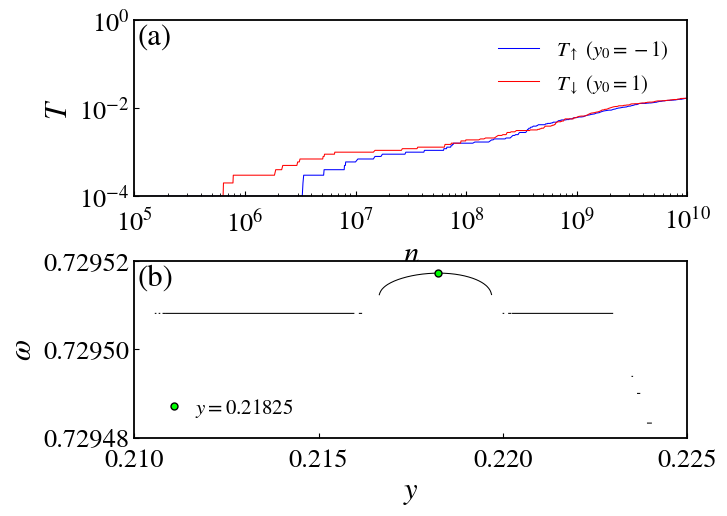

In [ ]:
fontsize=22
plot_params(fontsize=fontsize, legend_fontsize=15)
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
set_ticks_in(ax, pad_x=8)
lw = 0.75
xbox = 0.0053
ybox = 0.866
bbox = {"facecolor": "white", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

df = f'Data/transmissivity_vs_N_m=-1.00000_y0=-1.00000_nic=10000_N=10000000000_escy=1.00000.dat'
# time, transmissivity = np.loadtxt(df, unpack=True)
df = pd.read_csv(df, sep=r"\s+", header=None)
time = df[0].values
transmissivity = df[1].values
ax[0].plot(time, transmissivity, "b", lw=0.75, label="$T_\\uparrow$ ($y_0 = -1$)")

df = f'Data/transmissivity_vs_N_m=-1.00000_y0=1.00000_nic=10000_N=10000000000_escy=-1.00000.dat'
time, transmissivity = np.loadtxt(df, unpack=True)
ax[0].plot(time, transmissivity, "r", lw=0.75, label="$T_\\downarrow$ ($y_0 = 1$)")
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("$T$")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlim(1e5, 1e10)
ax[0].set_ylim(1e-4, 1)
ax[0].legend(loc="upper right", frameon=False, ncol=1, columnspacing=0.5)


df = f"Data/rotation_number_m=-9.00000_a=.80500_b=.59700_c=.00500_N=100000000.dat"
y, rn = np.loadtxt(df, unpack=True)
ax[1].plot(y, rn, "k", lw=0.75)
ax[1].set_xlabel("$y$")
ax[1].set_yticks([0.72948, 0.72950, 0.72952])
ax[1].set_ylim(0.72948, 0.72952)
ax[1].set_xlim(0.210, 0.225)
ax[1].set_xticks([0.21, 0.215, 0.22, 0.225])
ax[1].set_ylabel(r"$\omega$")

for i in range(2):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax[i].transAxes, bbox=bbox)

# Remove nan from rn
y = y[~np.isnan(rn)]
rn = rn[~np.isnan(rn)]
y_max = y[rn == rn.max()]
rn_max = rn[rn == rn.max()]
ax[1].plot(y_max, rn_max, "o", markersize=5, c="lime", markeredgecolor="k", label=f"$y = {y_max[0]:.5f}$")
ax[1].legend(loc="lower left", frameon=False, ncol=1, columnspacing=0.1, handletextpad=0.)


plt.subplots_adjust(left=0.17, bottom=0.135, right=0.96, top=0.97, hspace=0.37)
figname = "Figures/fig7.png"
plt.savefig(figname, dpi=400)